#This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic 
measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database.
In particular, all patients here are females at least 21 years old of Pima Indian heritage.


Pregnancies
Number of times pregnant

Glucose
Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure
Diastolic blood pressure (mm Hg)


SkinThickness
Triceps skin fold thickness (mm)


Insulin
2-Hour serum insulin (mu U/ml)

Numeric
BMI
Body mass index (weight in kg/(height in m)^2)


DiabetesPedigreeFunction
Diabetes pedigree function

Numeric
Age
Age (years)

Numeric
Outcome
Class variable (0 or 1)



In [1]:
#First of all we would import pandas and numpy for the basic operation

In [2]:
import pandas as pd
import numpy as np

In [3]:
x=pd.read_csv('F:/Study/diabetes.csv',header=0,index_col=None)

In [4]:
x.shape

(768, 9)

In [5]:
x=x.drop(x[(x.BloodPressure < 40) & (x.Insulin < 10) & (x.SkinThickness < 10)].index)

In [6]:
y =x.Outcome                          
list = ['Outcome']
x = x.drop(list,axis = 1 )
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Normal 482
diabetic 253


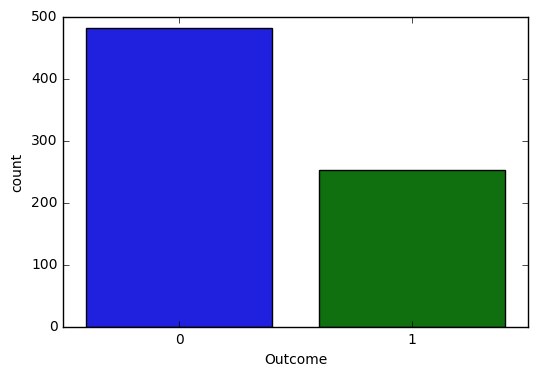

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
s=sns.countplot(y,label='count')
N, D = y.value_counts()
print("Normal",N)
print("diabetic",D)


In [8]:
x.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,3.865306,121.006803,72.208163,21.458503,83.382313,32.298503,0.476392,33.364626
std,3.371152,32.161949,12.928495,15.687622,116.529560,7.268129,0.333921,11.831485
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.245000,24.000000
50%,3.000000,117.000000,72.000000,24.000000,45.000000,32.300000,0.380000,29.000000
75%,6.000000,141.000000,80.000000,33.000000,130.000000,36.600000,0.630000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


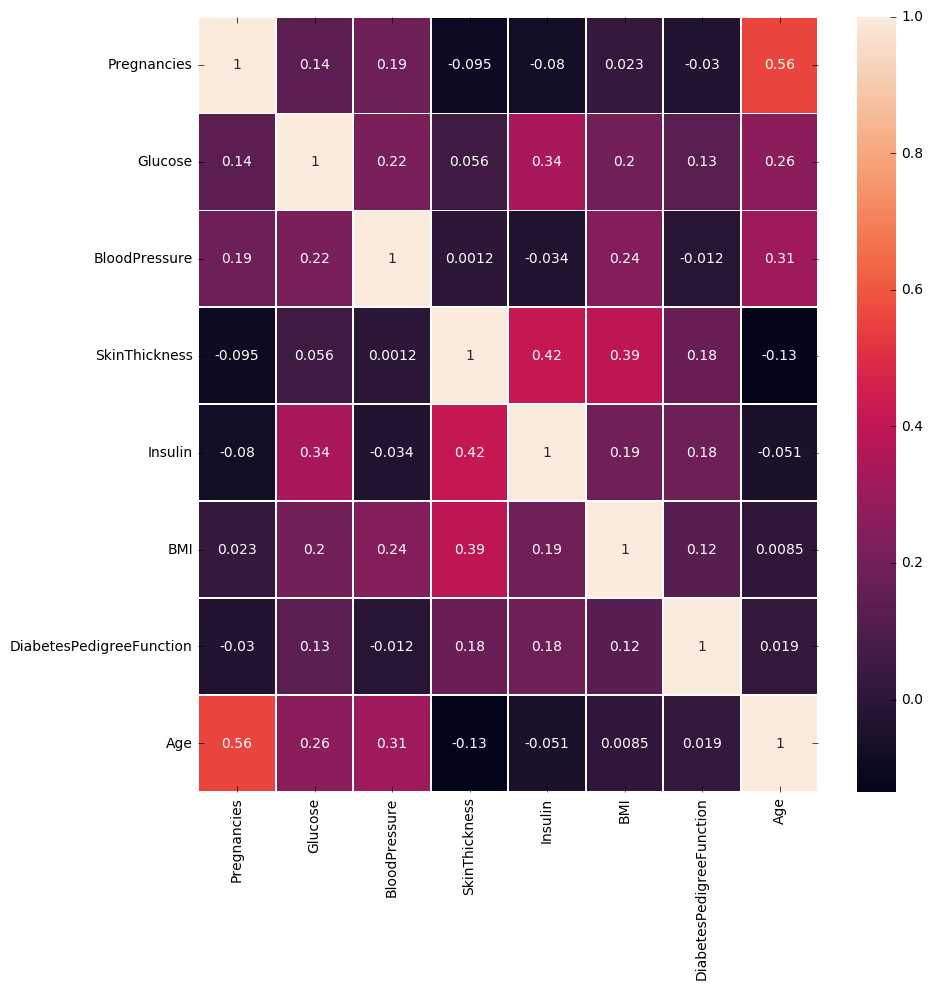

In [9]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(x.corr(), annot=True, linewidths=.5,ax=ax)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5C98F43C8>,
      dtype=object)

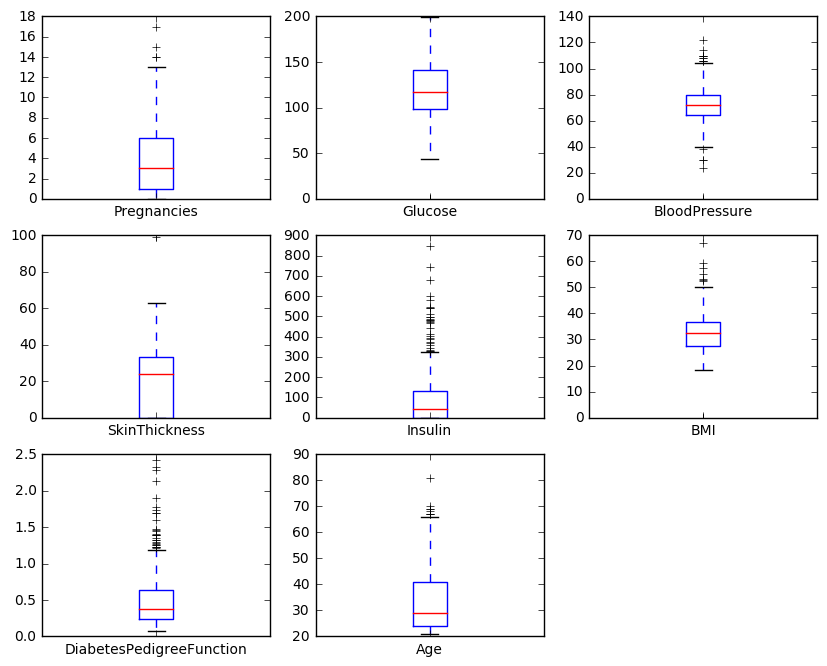

In [10]:
x.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))
#single horizontal line gives the median ir half data is below and half above, the line is the range, the bubbles are outliers
#that tell us about the values that are numerically distant from the rest data

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

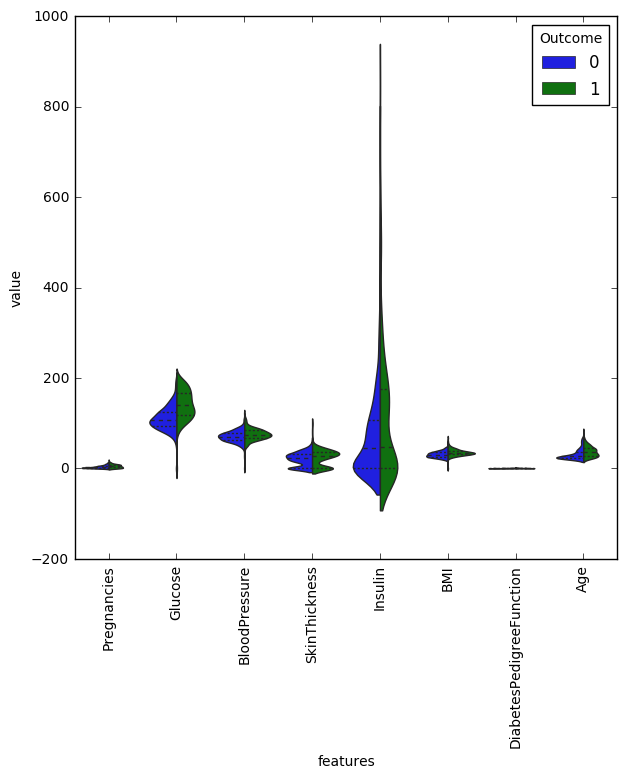

In [11]:
%matplotlib inline 
data_dia = y
data = x          
data = pd.concat([y,data.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="Outcome",var_name="features",value_name='value')
plt.figure(figsize=(7,7))
sns.violinplot(x="features", y="value", hue="Outcome", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

In [14]:
from sklearn.cross_validation import train_test_split as tts, cross_val_score as cvs
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import accuracy_score

In [15]:
x_train, x_test, y_train, y_test =tts(x, y, test_size=0.3, random_state=42)
clf_rf=rfc(random_state=43)
clr_rf = clf_rf.fit(x_train,y_train)
clf_rf.score(x_test,y_test)


0.7149321266968326

In [16]:
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn import metrics
knn=knc(n_neighbors=18)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.7239819004524887

In [17]:
print(cvs(clf_rf,x,y,cv=15,scoring="accuracy",).mean())
print(cvs(knn,x,y,cv=10,scoring="accuracy",).mean())

0.7605986394557823
0.7525173392570653


In [18]:
y_train.shape

(514,)

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [  42.62262703  975.31584094   42.89453545   71.80224654 1989.6134598
   77.61982238    3.43224888  141.39596214]
Feature list: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [20]:
print("Feature importances:\n{}".format(clf_rf.feature_importances_))

Feature importances:
[0.06019341 0.23446863 0.09626349 0.08233938 0.08071586 0.17829856
 0.13132547 0.1363952 ]


In [21]:
diabetes_features = [x for i,x in enumerate(x.columns) if i!=8]

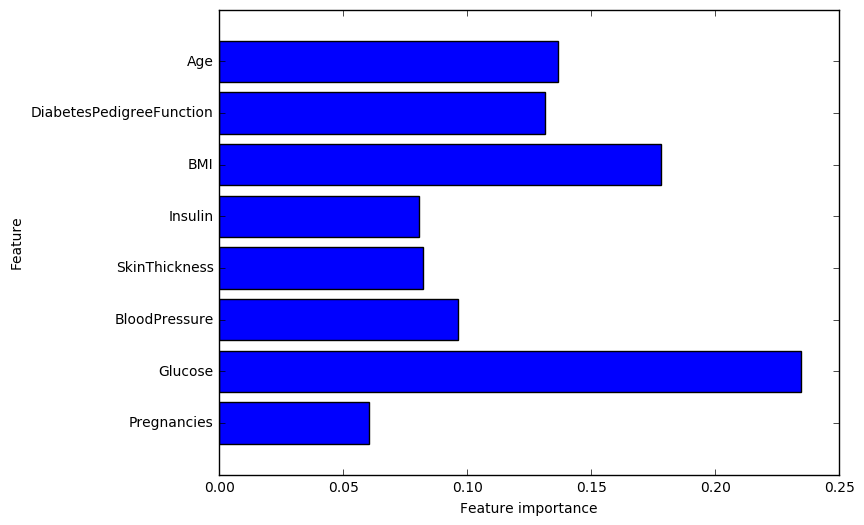

In [22]:
#tree
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(clf_rf)
plt.savefig('feature_importance')

In [23]:
x=x.drop(['SkinThickness','Pregnancies'], axis=1)

In [24]:
x.shape

(735, 6)

In [25]:
x.head()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,0,33.6,0.627,50
1,85,66,0,26.6,0.351,31
2,183,64,0,23.3,0.672,32
3,89,66,94,28.1,0.167,21
4,137,40,168,43.1,2.288,33


In [26]:
x_train, x_test, y_train, y_test = tts(x,y,test_size=0.39,random_state=0)

In [27]:
from sklearn import tree
clf_dt = tree.DecisionTreeClassifier(max_depth=3,random_state=1)
clf_dt.fit (x_train, y_train)
print(clf_dt.score (x_train, y_train))
clf_dt.score (x_test, y_test)

0.8169642857142857


0.7247386759581882

In [30]:
from sklearn.cross_validation import cross_val_score as cvs
scores=cvs(clf_rf,x,y,cv=5)
print(format(scores.mean()))

0.75655514334575


In [31]:
from sklearn.ensemble import GradientBoostingClassifier as gbc
clf_gb=gbc(n_estimators=54,random_state=1)
clf_gb=clf_gb.fit(x_train,y_train)
clf_gb.score(x_test,y_test)

0.7630662020905923

In [32]:
scores=cvs(clf_gb,x,y,cv=5)
print(format(scores.mean()))

0.7742524184794244


In [33]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler().fit(x)
xs= minmax_scale.transform(x)
print(type(xs),type(x))
xs = pd.DataFrame(xs)
type(xs)


<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>


pandas.core.frame.DataFrame

In [34]:
x1_train, x1_test, y_train, y_test = tts(xs,y,test_size=0.39,random_state=0)

In [35]:
from sklearn.ensemble import GradientBoostingClassifier as gbc
clf_gb=gbc(n_estimators=54,random_state=1)
clf_gb=clf_gb.fit(x1_train,y_train)
clf_gb.score(x1_test,y_test)

0.7630662020905923

In [36]:
scores=cvs(clf_gb,xs,y,cv=6)
print(format(scores.mean()))

0.7837594352939828


In [37]:
x.head()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,0,33.6,0.627,50
1,85,66,0,26.6,0.351,31
2,183,64,0,23.3,0.672,32
3,89,66,94,28.1,0.167,21
4,137,40,168,43.1,2.288,33
